[Reference](https://medium.com/@arnab.sen44/create-neat-technical-diagrams-using-python-4e5296b78c02)

In [1]:
pip install diagrams 

     |████████████████████████████████| 23.2 MB 1.8 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4         

# Create the First diagram

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.integration import SQS
from  diagrams.aws.storage import S3
from diagrams.saas.chat import Slack
attributes = {"pad": "1.0", "fontsize": "25"}
with Diagram("message flow", show=True, direction="LR",
             outformat="png",
             graph_attr=attributes):
    elb =  ELB("load balancer")
    service1 = EC2('Service1')
    service2 = EC2('Service2')
    service3 = EC2('service3')
    db = RDS("primary DB")
    
    elb >> service1 >> db
    elb >> service2 >> db
    service1 >> SQS('sqs') >> service3 >> S3('s3')

In [4]:
!ls

message_flow.png  sample_data


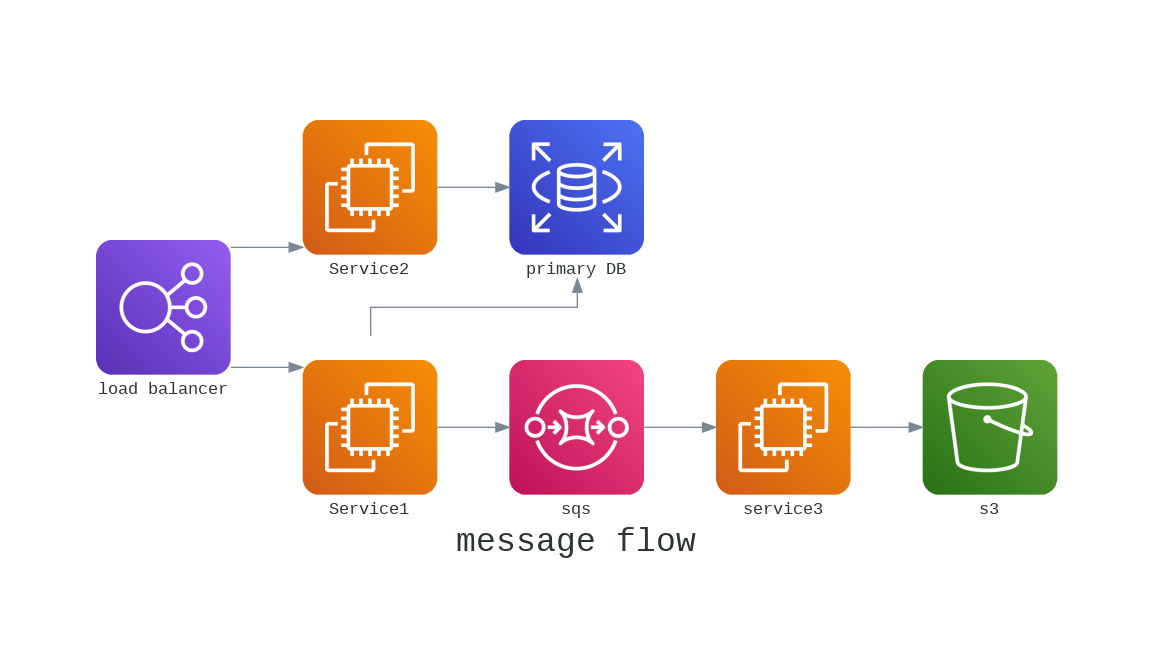

In [5]:
import os,sys
from IPython.display import Image
Image("message_flow.png")

# Adding More descriptive Edges

In [6]:
from diagrams import Edge
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.integration import SQS
from  diagrams.aws.storage import S3
from diagrams.saas.chat import Slack
attributes = {"pad": "1.0", "fontsize": "25"}
with Diagram("message flow", show=True, direction="LR",
             outformat="png",
             graph_attr=attributes):
    elb =  ELB("load balancer")
    service1 = EC2('Service1')
    service2 = EC2('Service2')
    service3 = EC2('service3')
    db = RDS("primary DB")
    
    elb >> service1 >> db
    elb >> service2 >> db
    service1 >> SQS('sqs') >> service3 >> S3('s3')

    service3 >> Edge(label='sending error notification', color='red', style='dashed') >> Slack('slack notification')

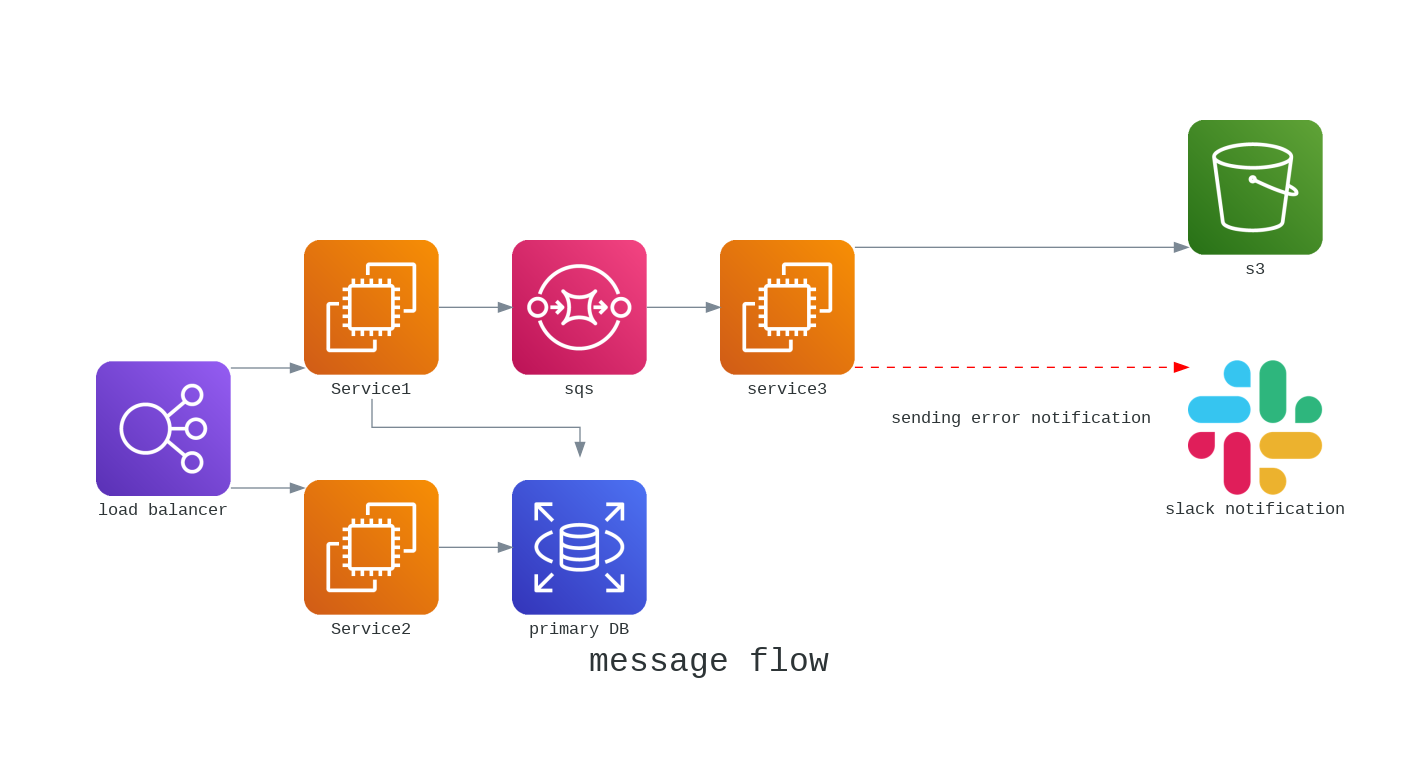

In [7]:
import os,sys
from IPython.display import Image
Image("message_flow.png")

# Adding custom node

In [8]:
from diagrams.custom import Custom
from diagrams import Edge
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.integration import SQS
from  diagrams.aws.storage import S3
from diagrams.saas.chat import Slack

attributes = {"pad": "1.0", "fontsize": "25"}

with Diagram("message flow", show=True, direction="LR",
             outformat="png",
             graph_attr=attributes):
    elb =  ELB("load balancer")
    service1 = EC2('Service1')
    service2 = EC2('Service2')
    service3 = EC2('service3')
    db = RDS("primary DB")
    email = Custom('Email notification', 'email.png')
    sms = Custom('SMS notification', 'sms.png')
    
    elb >> service1 >> db
    elb >> service2 >> db
    service1 >> SQS('sqs') >> service3 >> S3('s3')
    service3 >> Edge(label='sending error notification', color='red', style='dashed') >> [Slack('slack notification'),                                                                                      email, sms]

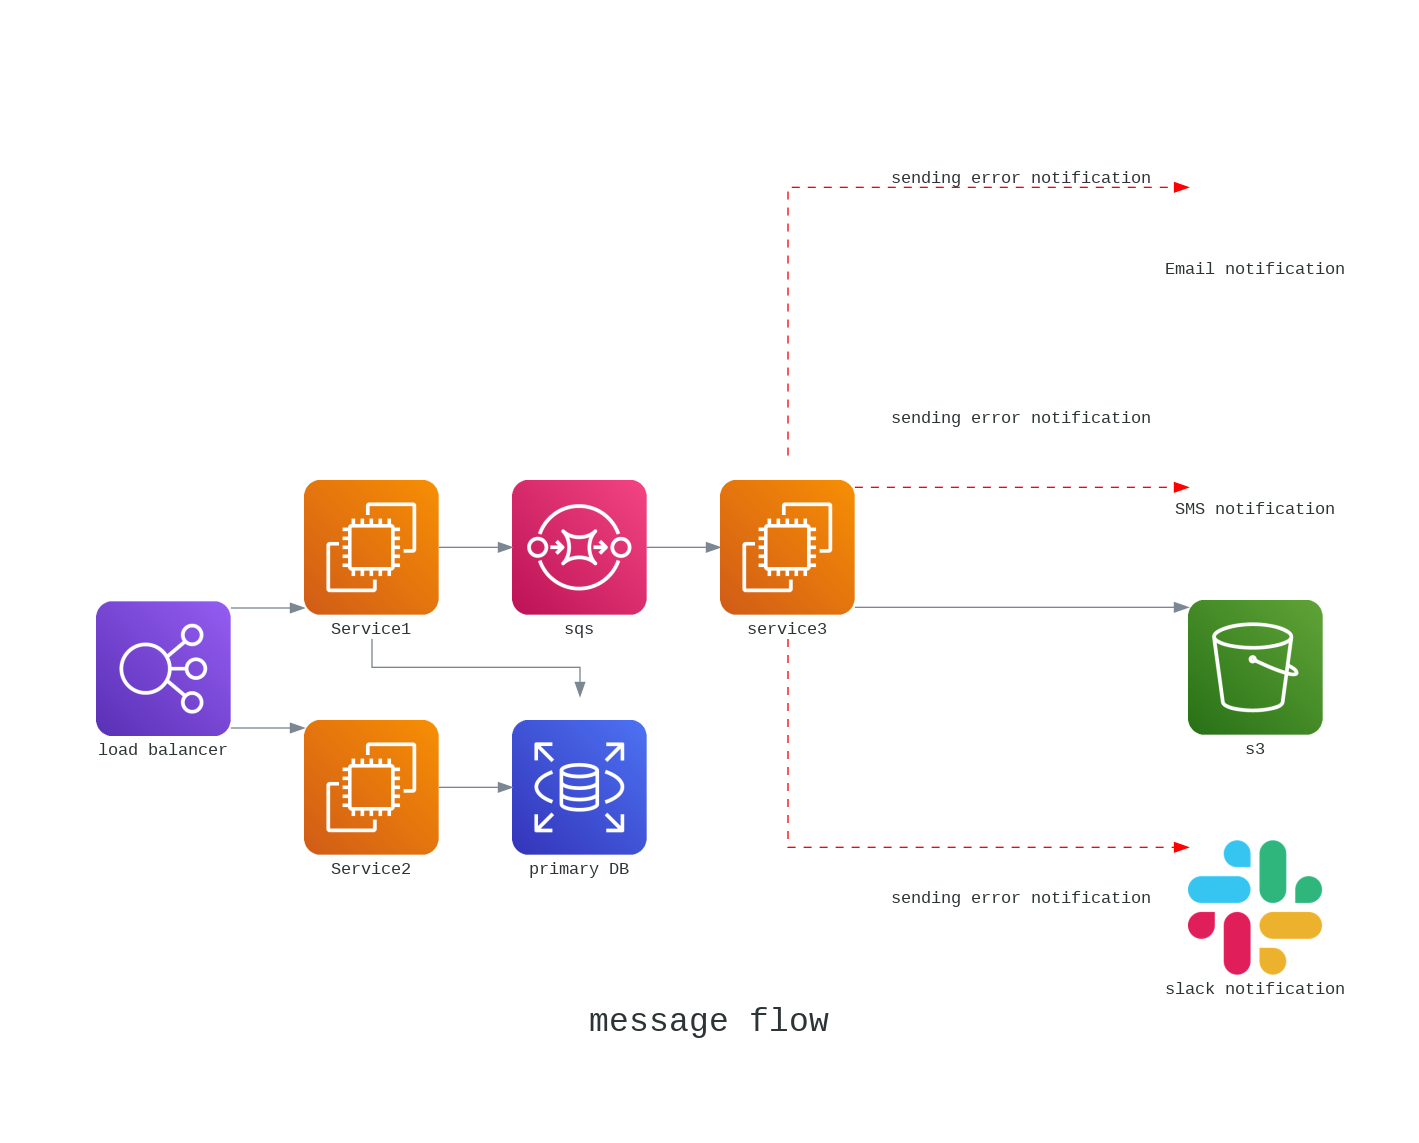

In [9]:
import os,sys
from IPython.display import Image
Image("message_flow.png")

# Grouping and clustering of nodes

In [10]:
from diagrams import Diagram, Edge, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.generic.database import SQL
from diagrams.aws.network import ELB
from diagrams.aws.integration import SQS
from  diagrams.aws.storage import S3
from diagrams.saas.chat import Slack
from diagrams.custom import Custom

attributes = {"pad": "1.0", "fontsize": "25"}
with Diagram("Sample data flow in microdervice architecture", show=True, direction="LR",
             outformat="png",
             graph_attr=attributes):
    
    with Cluster("Service layer") as services:
        service1 = EC2('Service1')
        service2 = EC2('Service2')
        service3 = EC2('service3')
        request_handlers = [service1, service2, service3]
        
    with Cluster("Elastic load balancers") as elbs:
        elb1 =  ELB("Load balancer1")
        elb2 =  ELB("Load balancer2")
        elbs = [elb1, elb2]
    
    with Cluster("Database layer") as dblayer:
        rds_dbs = [RDS('db1'), RDS('db2')]
        sql_db = SQL('db3')
    
    with Cluster('Batch processing layer') as batch_processors:
        service4 = EC2('Service4')
        service5 = EC2('Service5')
        batch_processors = [service4, service5]
    with Cluster('Notification channels') as notifications:
        email = Custom('Email notification', 'email.png')
        sms = Custom('SMS notification', 'sms.png')
        notifications = [Slack('slack notification'), email, sms]

    
    elb1 >>  Edge(label='requests') >> request_handlers
    elb2 >>  Edge(label='requests') >> request_handlers
    service1 >> Edge(label='store data') >> rds_dbs
    [service2, service3] >> Edge(label='store data') >> sql_db
    request_handlers >> SQS('sqs') >> batch_processors 
    service4 >> Edge(label='sending error notification', color='red', style='dashed') >> notifications
    service5 >> Edge(label='sending error notification', color='red', style='dashed') >> notifications


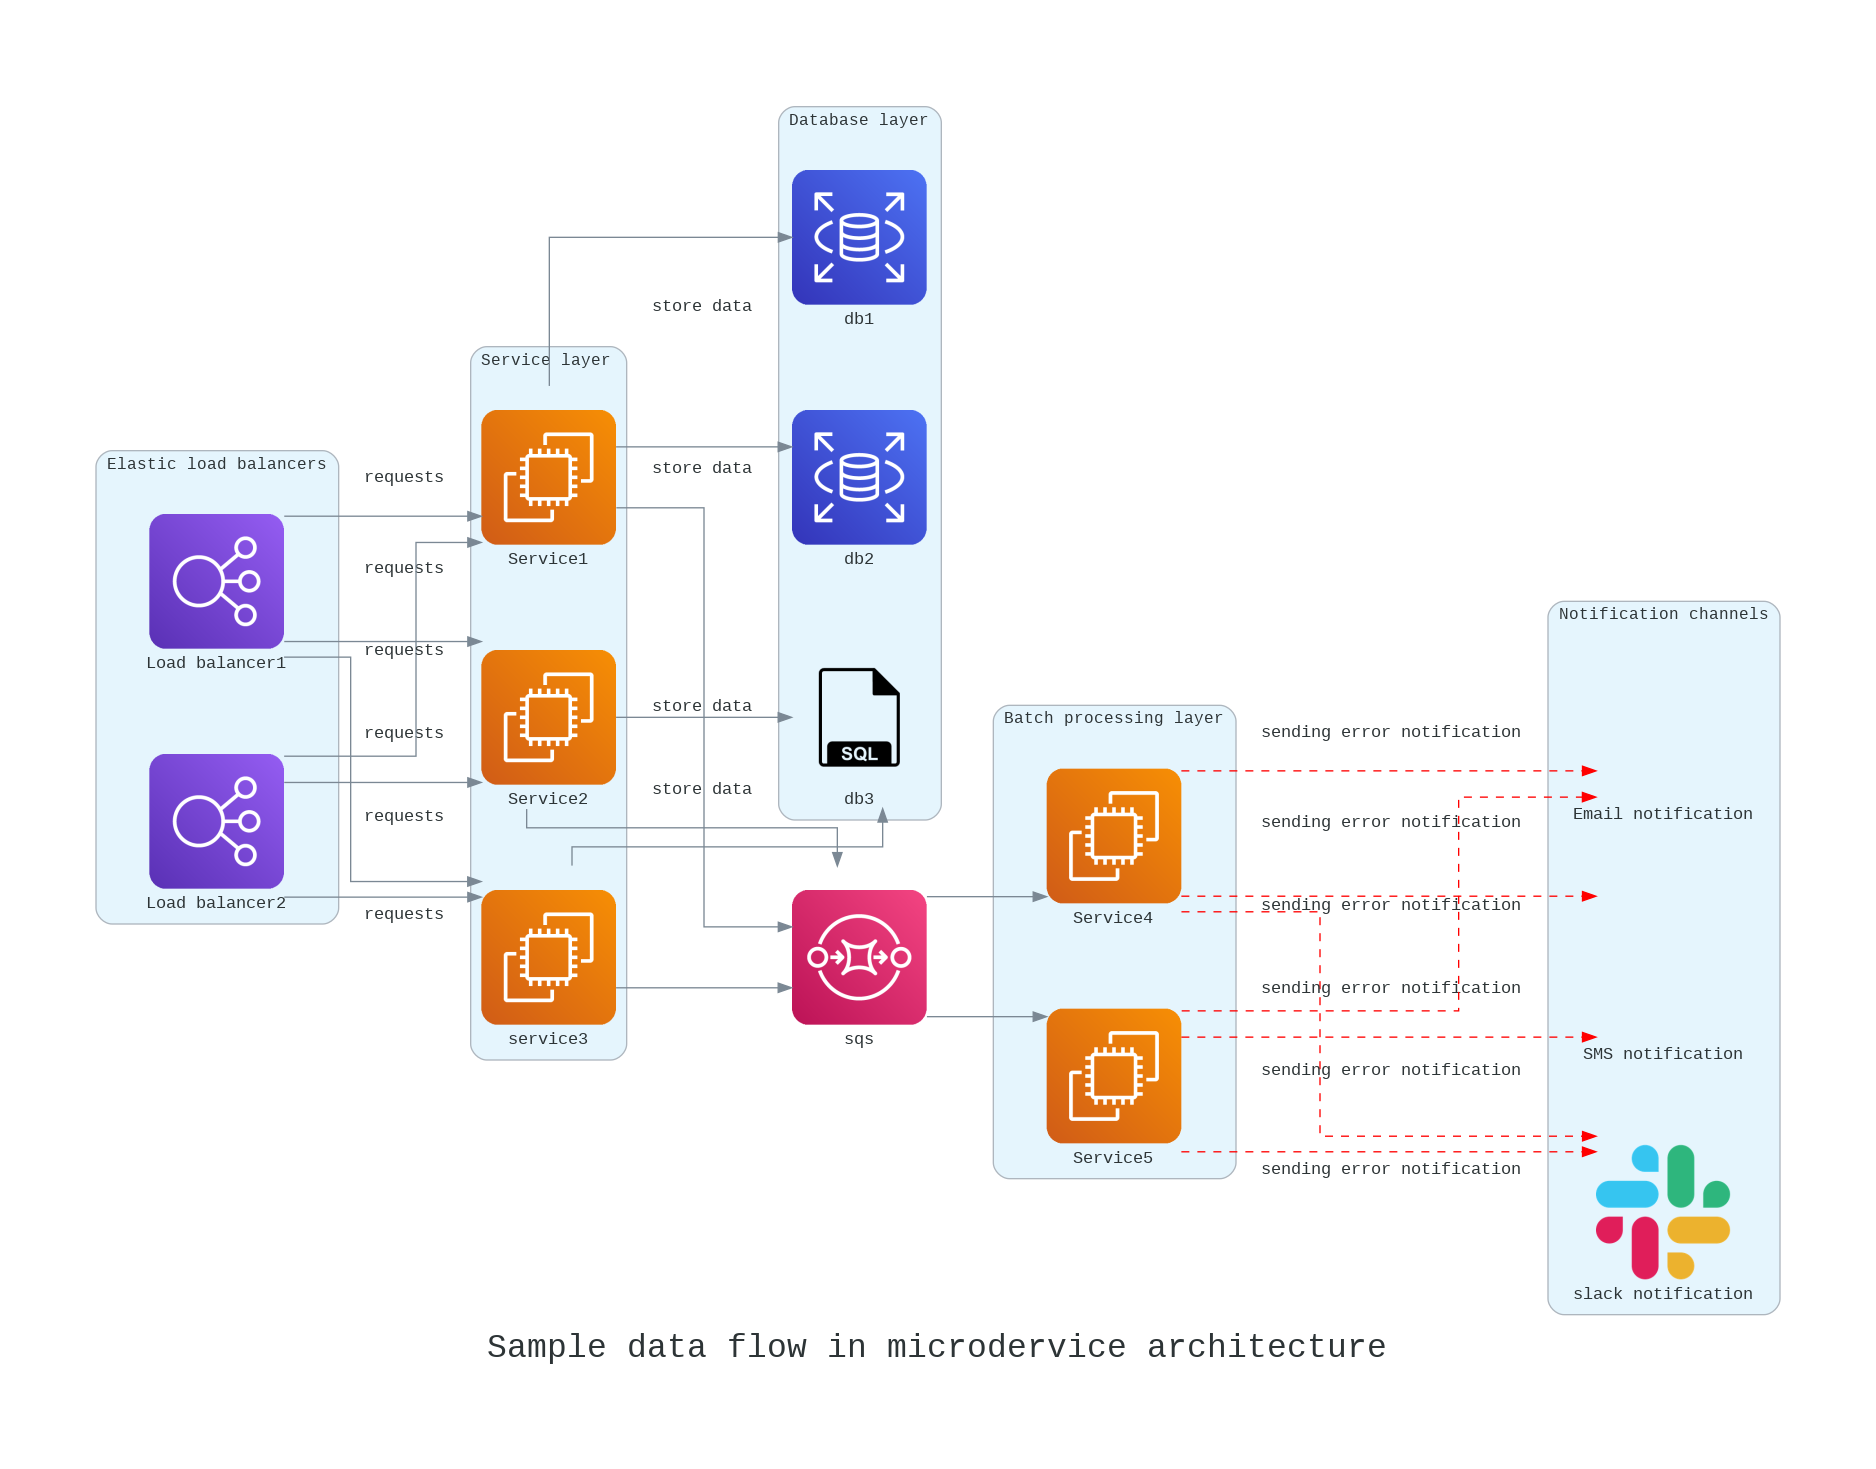

In [11]:
import os,sys
from IPython.display import Image
Image("sample_data_flow_in_microdervice_architecture.png")